In [1]:
!pip install conda
!pip install rdkit

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [2]:
import pandas as pd

In [3]:
x=pd.read_csv('bio-2.csv')
x.head()

,Unnamed: 0,molecule_chembl_id,standard_value,canonical_smiles,bioactivity
0,0,CHEMBL1401841,100000.0,COc1ccc2nc3cccc(OC)c3nc2c1,inactive
1,1,CHEMBL1608853,12310.0,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive
2,2,CHEMBL1429799,100000.0,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive
3,3,CHEMBL246446,50970.0,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive
4,4,CHEMBL1383455,100000.0,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive


In [4]:
x.shape

(1237, 5)

In [5]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [6]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors
     


In [7]:
df_lip=lipinski(x.canonical_smiles)

In [8]:
df_lip.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,240.262,2.80020,0.0,4.0
1,268.224,2.44040,1.0,4.0
2,407.426,1.38560,1.0,5.0
3,306.277,3.84800,1.0,5.0
4,372.772,2.36698,0.0,8.0


In [9]:
df_lip.shape

(1237, 4)

logp-solubility
mw-molar weight


In [11]:
xa=pd.concat([x,df_lip],axis=1)

In [12]:
xa.head()

,Unnamed: 0,molecule_chembl_id,standard_value,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL1401841,100000.0,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0
1,1,CHEMBL1608853,12310.0,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0
2,2,CHEMBL1429799,100000.0,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0
3,3,CHEMBL246446,50970.0,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0
4,4,CHEMBL1383455,100000.0,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0


In [13]:
xa

,Unnamed: 0,molecule_chembl_id,standard_value,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors
0,0,CHEMBL1401841,100000.0,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0
1,1,CHEMBL1608853,12310.0,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0
2,2,CHEMBL1429799,100000.0,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0
3,3,CHEMBL246446,50970.0,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0
4,4,CHEMBL1383455,100000.0,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...,...
1232,1279,CHEMBL5190612,25200.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,inactive,505.543,6.15692,1.0,6.0
1233,1280,CHEMBL5176952,23900.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,inactive,505.543,6.15692,1.0,6.0
1234,1281,CHEMBL5184942,24000.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,inactive,505.543,6.15692,1.0,6.0
1235,1282,CHEMBL4526128,9610.0,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0


In [14]:
xa.shape

(1237, 9)

In [15]:
xa.drop(columns=['Unnamed: 0'])

,molecule_chembl_id,standard_value,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL1401841,100000.0,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0
1,CHEMBL1608853,12310.0,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0
2,CHEMBL1429799,100000.0,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0
3,CHEMBL246446,50970.0,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0
4,CHEMBL1383455,100000.0,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0
...,...,...,...,...,...,...,...,...
1232,CHEMBL5190612,25200.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,inactive,505.543,6.15692,1.0,6.0
1233,CHEMBL5176952,23900.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,inactive,505.543,6.15692,1.0,6.0
1234,CHEMBL5184942,24000.0,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,inactive,505.543,6.15692,1.0,6.0
1235,CHEMBL4526128,9610.0,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0


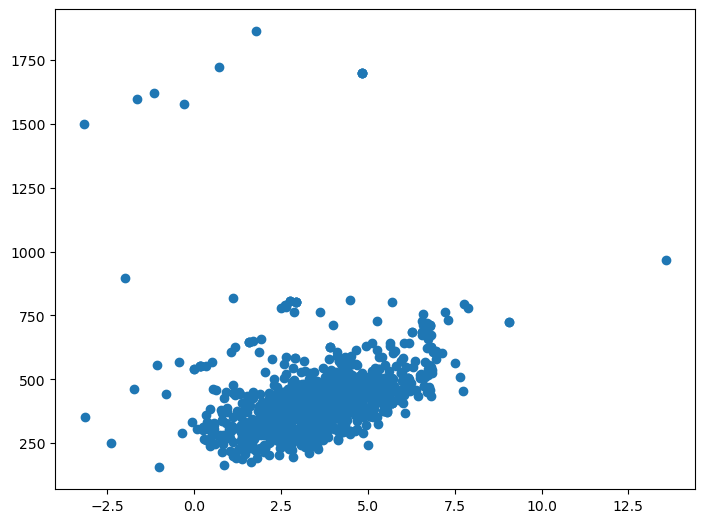

In [35]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(xa.LogP,xa.MW)
plt.show()

In [67]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

In [41]:
xa.standard_value.describe()

count      1237.000000
mean      46433.283331
std       34762.712868
min           0.480000
25%       19410.000000
50%       39880.000000
75%       68100.000000
max      432000.000000
Name: standard_value, dtype: float64

In [43]:
-np.log10( (10**-9)* 100000000 )

1.0

In [45]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [57]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
            i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)  # Corrected axis argument
        
    return x




In [59]:
df_norm = norm_value(xa)
df_norm

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,100000.0
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,12310.0
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,100000.0
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,50970.0
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,100000.0
...,...,...,...,...,...,...,...,...,...
1232,1279,CHEMBL5190612,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,inactive,505.543,6.15692,1.0,6.0,25200.0
1233,1280,CHEMBL5176952,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,inactive,505.543,6.15692,1.0,6.0,23900.0
1234,1281,CHEMBL5184942,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,inactive,505.543,6.15692,1.0,6.0,24000.0
1235,1282,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0,9610.0


In [63]:
df_norm.standard_value_norm.describe()

count      1237.000000
mean      46433.283331
std       34762.712868
min           0.480000
25%       19410.000000
50%       39880.000000
75%       68100.000000
max      432000.000000
Name: standard_value_norm, dtype: float64

In [69]:
df_final = pIC50(df_norm)
df_final

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000
...,...,...,...,...,...,...,...,...,...
1232,1279,CHEMBL5190612,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccc(C(F)(F)F...,inactive,505.543,6.15692,1.0,6.0,4.598599
1233,1280,CHEMBL5176952,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4cccc(C(F)(F)...,inactive,505.543,6.15692,1.0,6.0,4.621602
1234,1281,CHEMBL5184942,Cc1ccc(S(=O)(=O)Nc2ccc(-c3nnc(SCc4ccccc4C(F)(F...,inactive,505.543,6.15692,1.0,6.0,4.619789
1235,1282,CHEMBL4526128,O=C(N[C@@H](Cc1ccc(O)cc1)C(=O)O)c1cc(-c2ccccc2...,intermediate,582.678,6.02400,3.0,7.0,5.017277


In [75]:
df_final2 = df_final[df_final['bioactivity'] != 'intermediate']

In [77]:
df_final2.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000


In [83]:
a=df_final2.drop(columns='Unnamed: 0')

In [85]:
a.head()

,molecule_chembl_id,canonical_smiles,bioactivity,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL1401841,COc1ccc2nc3cccc(OC)c3nc2c1,inactive,240.262,2.80020,0.0,4.0,4.000000
1,CHEMBL1608853,O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O,inactive,268.224,2.44040,1.0,4.0,4.909742
2,CHEMBL1429799,O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CC...,inactive,407.426,1.38560,1.0,5.0,4.000000
3,CHEMBL246446,O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1,inactive,306.277,3.84800,1.0,5.0,4.292685
4,CHEMBL1383455,CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(C...,inactive,372.772,2.36698,0.0,8.0,4.000000


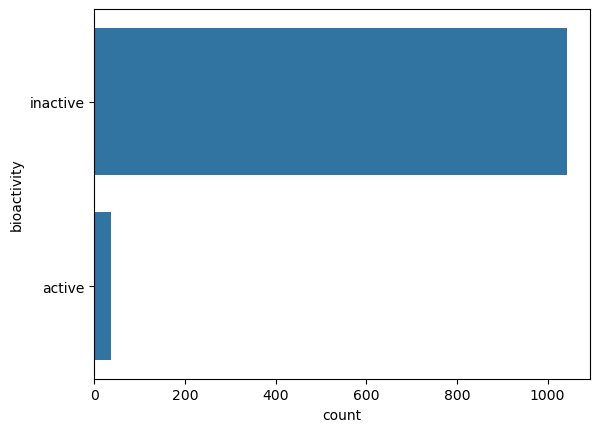

In [103]:
import seaborn as sns
sns.countplot(df_final2.bioactivity)
plt.show()

In [113]:
df_final2.bioactivity.unique()

'inactiveactive'

In [117]:
ab=df_final2['bioactivity'].value_counts()

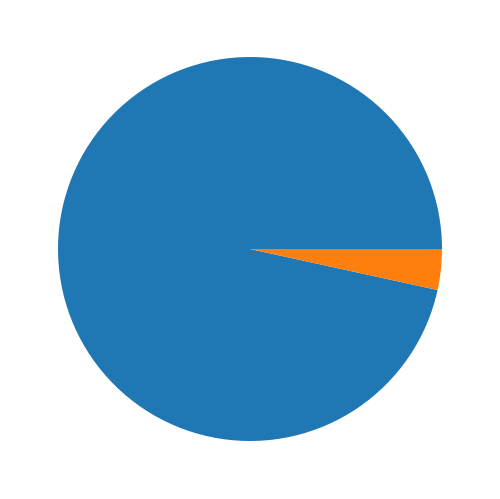

In [121]:
fig1=plt.figure()
ax=fig1.add_axes([0,0,1,1])
ax.pie(ab)

plt.show()


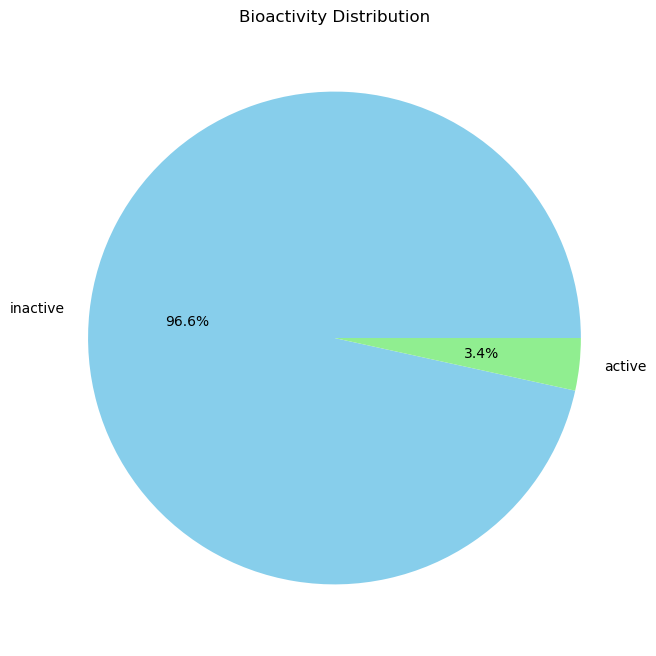

In [123]:
import matplotlib.pyplot as plt

# Get the value counts for the 'bioactivity' column
bioactivity_counts = df_final2['bioactivity'].value_counts()

# Plot a pie chart
bioactivity_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), colors=['skyblue', 'lightgreen', 'coral'])

# Set the title
plt.title('Bioactivity Distribution')

# Display the plot
plt.ylabel('')  # Remove the y-label for a cleaner look
plt.show()


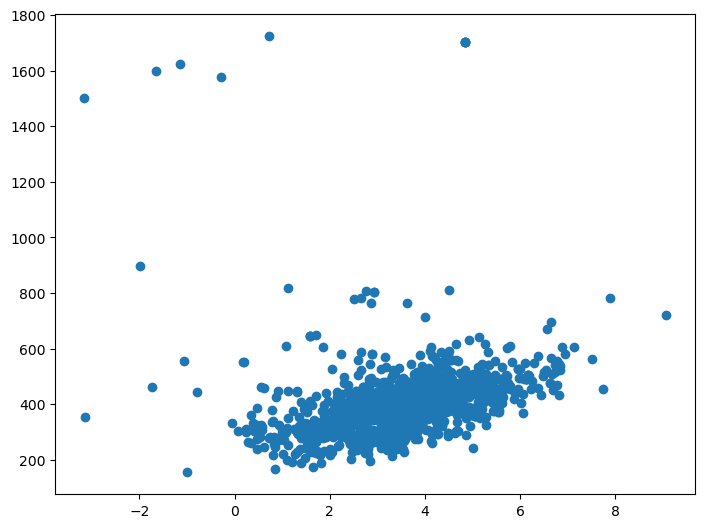

In [125]:
fig3=plt.figure()
ax=fig3.add_axes([0,0,1,1])
ax.scatter(a.LogP,a.MW)
plt.show()

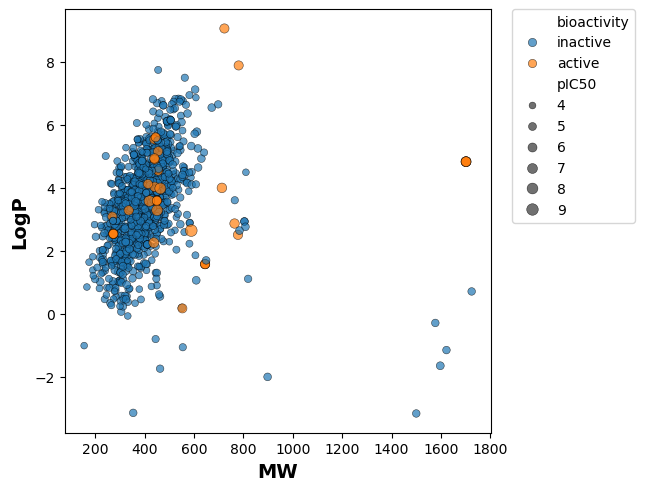

In [133]:


plt.figure(figsize=(5.5, 5.5))

# Use 'bioactivity' instead of 'class' for the hue parameter
sns.scatterplot(x='MW', y='LogP', data=a, hue='bioactivity', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')
plt.show()


In [135]:
a.columns

Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity', 'MW', 'LogP',
       'NumHDonors', 'NumHAcceptors', 'pIC50'],
      dtype='object')

<Axes: xlabel='bioactivity', ylabel='pIC50'>

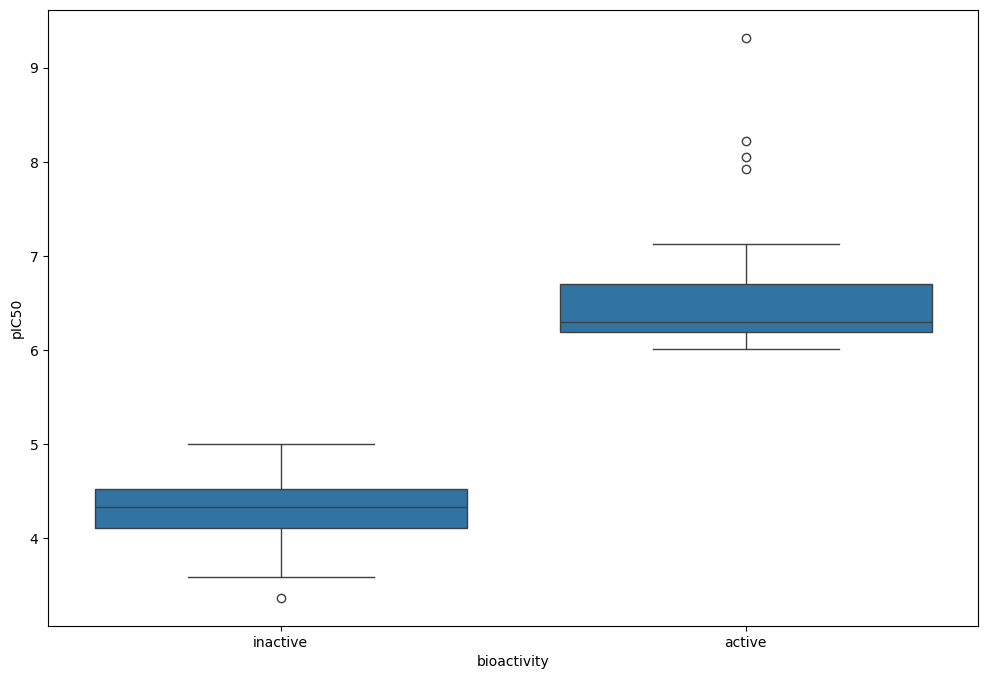

In [143]:
plt.figure(figsize=(12,8))
sns.boxplot(data=a,x='bioactivity',y='pIC50')

In [163]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity']
  df = a[selection]
  active = df[df['bioactivity'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity']
  df = a[selection]
  inactive = df[df['bioactivity'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv('bio-3.csv')

  return results
     

In [165]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,38554.0,3.468328e-25,0.05,Different distribution (reject H0)


In [1]:
plt.figure(figsize=(10,8))
sns.boxplot(data=a,x='bioactivity',y='MW')

NameError: name 'plt' is not defined

In [179]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,20381.0,0.553581,0.05,Same distribution (fail to reject H0)


<Axes: xlabel='bioactivity', ylabel='LogP'>

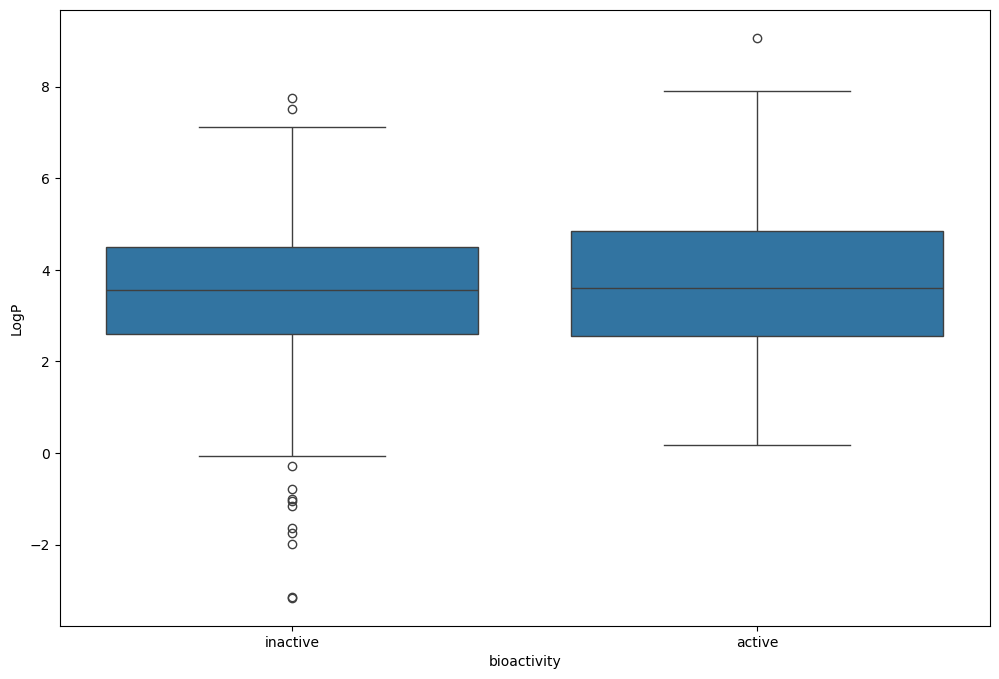

In [173]:
plt.figure(figsize=(12,8))
sns.boxplot(data=a,x='bioactivity',y='LogP')

In [181]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,30053.0,2.103118e-09,0.05,Different distribution (reject H0)


<Axes: xlabel='bioactivity', ylabel='NumHDonors'>

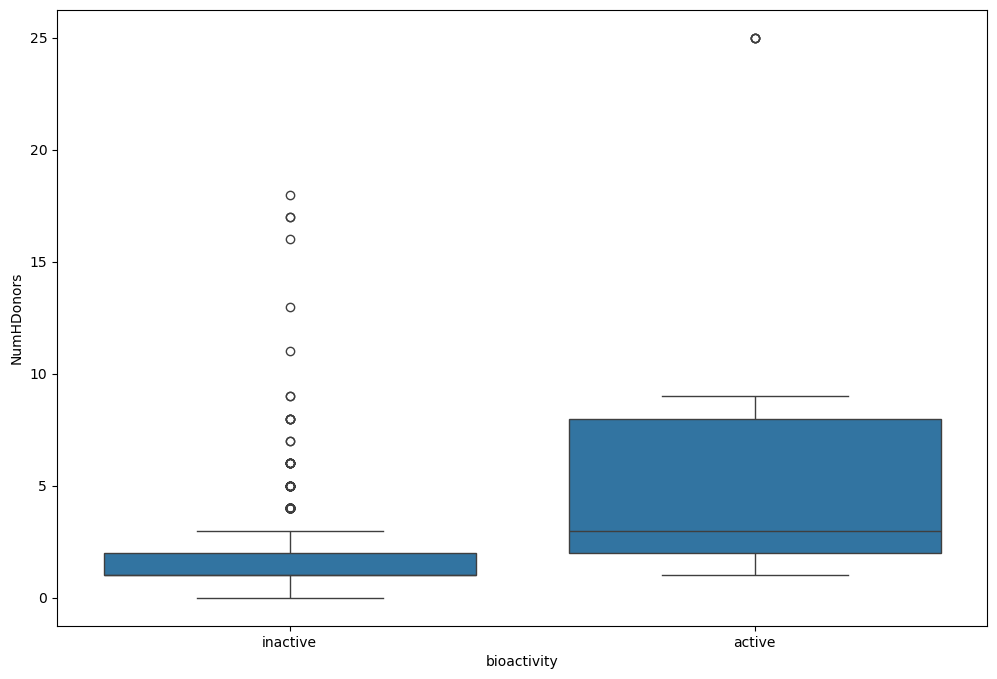

In [175]:
plt.figure(figsize=(12,8))
sns.boxplot(data=a,x='bioactivity',y='NumHDonors')

In [183]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,27951.5,0.000002,0.05,Different distribution (reject H0)


<Axes: xlabel='bioactivity', ylabel='NumHAcceptors'>

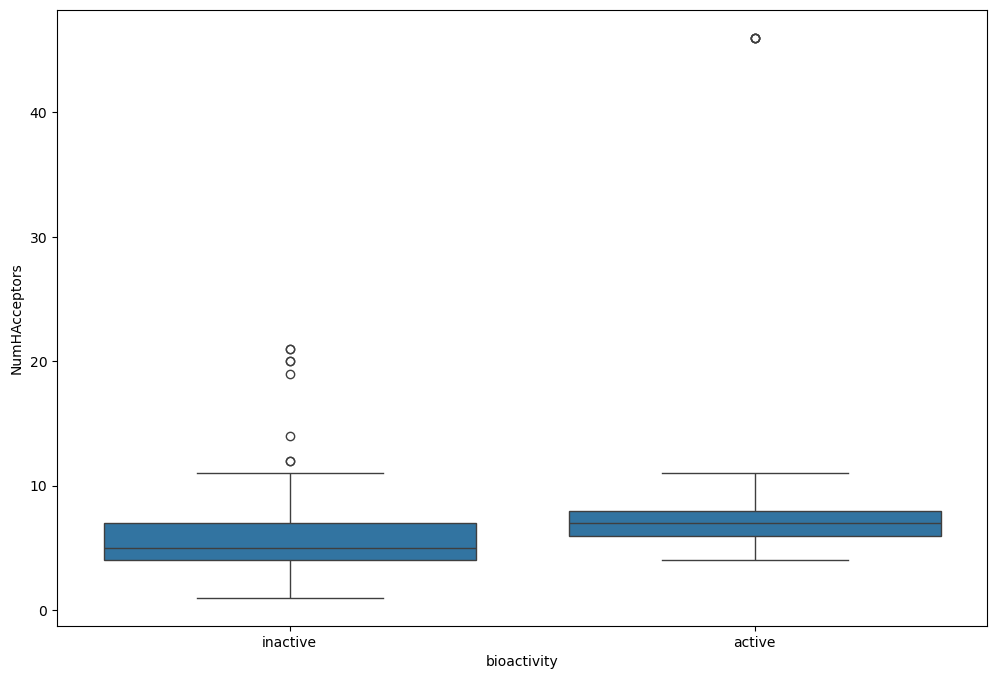

In [177]:
plt.figure(figsize=(12,8))
sns.boxplot(data=a,x='bioactivity',y='NumHAcceptors')

In [187]:
import requests

# URLs to download
urls = [
    "https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip",
    "https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh"
]

# Download the files
for url in urls:
    # Get the file name by splitting the URL
    file_name = url.split("/")[-1]

    # Send the request
    response = requests.get(url)

    # Write the content to a file
    with open(file_name, 'wb') as file:
        file.write(response.content)

    print(f"{file_name} downloaded.")


padel.zip downloaded.
padel.sh downloaded.


In [193]:
import zipfile

# Specify the name of the zip file
zip_file = "padel.zip"

# Open the zip file in read mode
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    # Extract all the contents into the current directory
    zip_ref.extractall()

print(f"{zip_file} has been unzipped successfully.")


padel.zip has been unzipped successfully.


In [195]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = a[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [197]:
a.to_csv('bio-4.csv')

In [199]:
# Open the file and read the first 5 lines
with open("molecule.smi", "r") as file:
    for i in range(5):
        line = file.readline().strip()
        print(line)


COc1ccc2nc3cccc(OC)c3nc2c1	CHEMBL1401841
O=C(O)c1ccc2c(c1)C(=O)/C(=C\c1ccco1)C2=O	CHEMBL1608853
O=C1NN(c2ccccc2)C(=O)/C1=C\c1ccccc1OCC(=O)N1CCOCC1	CHEMBL1429799
O=C(O)c1ccc2nc(-c3ccco3)c(-c3ccco3)nc2c1	CHEMBL246446
CCn1nc([N+](=O)[O-])c(C(C#N)c2nc3ccccc3n2C)c(Cl)c1=O	CHEMBL1383455


In [201]:
# Count the number of lines in the file
with open("molecule.smi", "r") as file:
    line_count = sum(1 for line in file)

print(f"Number of lines: {line_count}")


Number of lines: 1079


In [203]:
# Open and read the content of the shell script
with open("padel.sh", "r") as file:
    content = file.read()

print(content)


java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv



In [211]:
import subprocess

# Full path to bash, for example, in Git Bash
bash_path = r"C:\Program Files\Git\bin\bash.exe"
subprocess.run([bash_path, 'padel.sh'])


CompletedProcess(args=['C:\\Program Files\\Git\\bin\\bash.exe', 'padel.sh'], returncode=127)

In [215]:
subprocess.run([bash_path, 'padel.sh'])

CompletedProcess(args=['C:\\Program Files\\Git\\bin\\bash.exe', 'padel.sh'], returncode=127)

In [219]:
%%bash
echo "Hello, World!"
ls


Couldn't find program: 'bash'
